# PA 1: Exploratory Analysis over Dataset_R

## Student Details

Student Name and ID:
1. Navneeth Krishna (1002050459)
2. Bharath Racharla (1001848518)
3. Pullapolla Shivani (1002038803)

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'dataset_python.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
<b>[2.5 points]</b>

 ## Assignment Details

In this assignment, you will explore, manipulate and play with the data.

You will prepare a report with the following outline for each one of the dataset. Look at the following Example.

1.	Introduction

2.	Retrieving the Data

3.	Glimpse of Data

4.	Check for missing data

5.	Data Exploration

6.  Include a paragraph describing the contribution made by each team member


You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Python, Weka and R. DO Task 1, Task 2, Task 3, Task 4 using Python, Weka, R.
 
**Out of the 3 datasets listed below:**

**1. Dataset_python should be solved using Python in Jupyter notebook only.**

**2. Dataset_Weka using WEKA**

**3. Dataset_R using R**


You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

# Dataset Details

In this assignment, you will work on dataset_R. The columns of the data-set are:

- Loan Status - Loan approved (Y/N)
- Loan_ID - Unique Loan ID
- Gender - Male/ Female
- Married - Applicant married (Y/N)
- Dependents - Number of dependents
- Education Applicant - Education (Graduate/ Under Graduate)
- Self_Employed Self - employed (Y/N)
- ApplicantIncome - Applicant income
- CoapplicantIncome - Coapplicant income
- LoanAmount - Loan amount in thousands
- Loan_Amount_Term - Term of loan in months
- Credit_History - credit history meets guidelines
- Property_Area - Urban/ Semi Urban/ Rural)

In [1]:
# Import R packages
install.packages("dplyr")
install.packages("ggplot2")
library(dplyr)
library(ggplot2)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Read the file
data <- read.csv('dataset_R.csv')

In [3]:
# return the first 5 rows of the dataset
head(data, 5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>
1,LP001002,Male,No,0,Graduate,No,5849,0,NA,360,1,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
5,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


# Task 1: Statistical Exploratory Data Analysis(17.5 points)

In [4]:
# 1-a If any, print the total number of null values for each column in the dataset. Explain how you handle the null values (Hint: Null values must be filled or dropped from the dataset accordingly. How you handle the null values is upto you)
cat('The null values in each of the columns in the data set is as follows:\n')
null_counts <- colSums(is.na(data))
print(null_counts)

# Null values are dropped from the dataset:
clean_data <- data[complete.cases(data), ]
clean_data <- na.omit(clean_data)
clean_data <- clean_data[-which(clean_data$Gender == ""),]
clean_data <- clean_data[-which(clean_data$Self_Employed == ""),]
clean_data <- clean_data[-which(clean_data$Married == ""),]
clean_data <- clean_data[-which(clean_data$Dependents == ""),]
cat("The data set after omitting the null values:\n")
head(clean_data,5)


# Once again check for null values:
null_counts <- colSums(is.na(clean_data))
cat("The data set is checked again for null values:\n")
print(null_counts)
# It is verified that null values are ommitted from the dataset.


The null values in each of the columns in the data set is as follows:
          Loan_ID            Gender           Married        Dependents 
                0                 0                 0                 0 
        Education     Self_Employed   ApplicantIncome CoapplicantIncome 
                0                 0                 0                 0 
       LoanAmount  Loan_Amount_Term    Credit_History     Property_Area 
               22                14                50                 0 
      Loan_Status 
                0 
The data set after omitting the null values:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>
2,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
5,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
6,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y


The data set is checked again for null values:
          Loan_ID            Gender           Married        Dependents 
                0                 0                 0                 0 
        Education     Self_Employed   ApplicantIncome CoapplicantIncome 
                0                 0                 0                 0 
       LoanAmount  Loan_Amount_Term    Credit_History     Property_Area 
                0                 0                 0                 0 
      Loan_Status 
                0 


In [5]:
# 1-b Print the details of dataframe
summary(clean_data)

   Loan_ID             Gender            Married           Dependents       
 Length:480         Length:480         Length:480         Length:480        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
  Education         Self_Employed      ApplicantIncome CoapplicantIncome
 Length:480         Length:480         Min.   :  150   Min.   :    0    
 Class :character   Class :character   1st Qu.: 2899   1st Qu.:    0    
 Mode  :character   Mode  :character   Median : 3859   Median : 1084    
                                       Mean   : 5364   Mean   : 1581    
                                       3rd Qu.: 5852   3rd Qu.: 2253    
                       

In [6]:
# 1-c Find the number of rows and columns in dataset
dimensions <- dim(clean_data)
cat("The dataset has", dimensions[1], "rows and ", dimensions[2], "columns\n")

The dataset has 480 rows and  13 columns


In [7]:
# 1-d Print descriptive detail of a column in dataset
cat("Descriptive detail of column: ApplicantIncome\n")
summary(clean_data$ApplicantIncome)

Descriptive detail of column: ApplicantIncome


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    150    2899    3859    5364    5852   81000 

In [8]:
# Data Pre-processing for R

# Task 2: Aggregation & Filtering & Rank (30 points)

In [9]:
# Task 2-a: Find out the number of graduates from rural area
rural_graduates <- sum(clean_data$Education == "Graduate" & clean_data$Property_Area == "Rural")
cat("The number of graduates from rural area is: ", rural_graduates)

The number of graduates from rural area is:  105

In [10]:
# Task 2-b: determine the overall number of men who did not graduate
non_graduate_males = sum(clean_data$Gender == "Male" & clean_data$Education != "Graduate")
cat("The overall number of men who did not graduate is: ", non_graduate_males)

The overall number of men who did not graduate is:  84

In [11]:
# Task 2-c: Find the top 10 men who graduated and had the highest applicant income
top10_men_graduates <- clean_data %>% 
  filter(Gender == "Male" & Education == "Graduate") %>% 
  arrange(desc(ApplicantIncome)) %>% 
  head(10)

cat("The top 10 men who graduated and had the highest applicant income are:\n")
top10_men_graduates

The top 10 men who graduated and had the highest applicant income are:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>
1,LP002317,Male,Yes,3+,Graduate,No,81000,0,360,360,0,Rural,N
2,LP001536,Male,Yes,3+,Graduate,No,39999,0,600,180,0,Semiurban,Y
3,LP001640,Male,Yes,0,Graduate,Yes,39147,4750,120,360,1,Semiurban,Y
4,LP002422,Male,No,1,Graduate,No,37719,0,152,360,1,Semiurban,Y
5,LP001637,Male,Yes,1,Graduate,No,33846,0,260,360,1,Semiurban,N
6,LP001996,Male,No,0,Graduate,No,20233,0,480,360,1,Rural,N
7,LP002191,Male,Yes,0,Graduate,No,19730,5266,570,360,1,Rural,N
8,LP002547,Male,Yes,1,Graduate,No,18333,0,500,360,1,Urban,N
9,LP002699,Male,Yes,2,Graduate,Yes,17500,0,400,360,1,Rural,Y


In [12]:
# Task 2-d: Find the number of self-employed male applicants from urban area
num_self_employed_male_urban <- sum(clean_data$Gender == "Male" & clean_data$Property_Area == "Urban" & clean_data$Self_Employed == "Yes")
cat("The number of self employed male applicants from the urban area is: ", num_self_employed_male_urban)

The number of self employed male applicants from the urban area is:  16

# Task 3: Visualization (30 points)

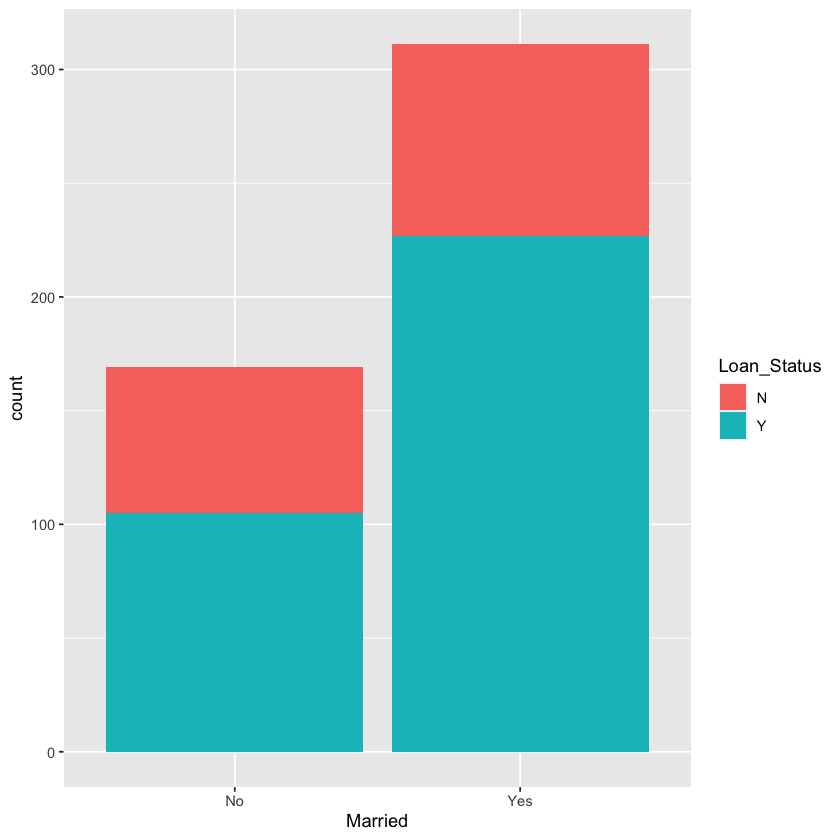

In [13]:
# Task 3-a Make a plot where married applicants are granted loans
ggplot(clean_data, aes(x = Married, fill = Loan_Status)) +
  geom_bar()


    Rural Semiurban     Urban 
     29.0      39.8      31.2 

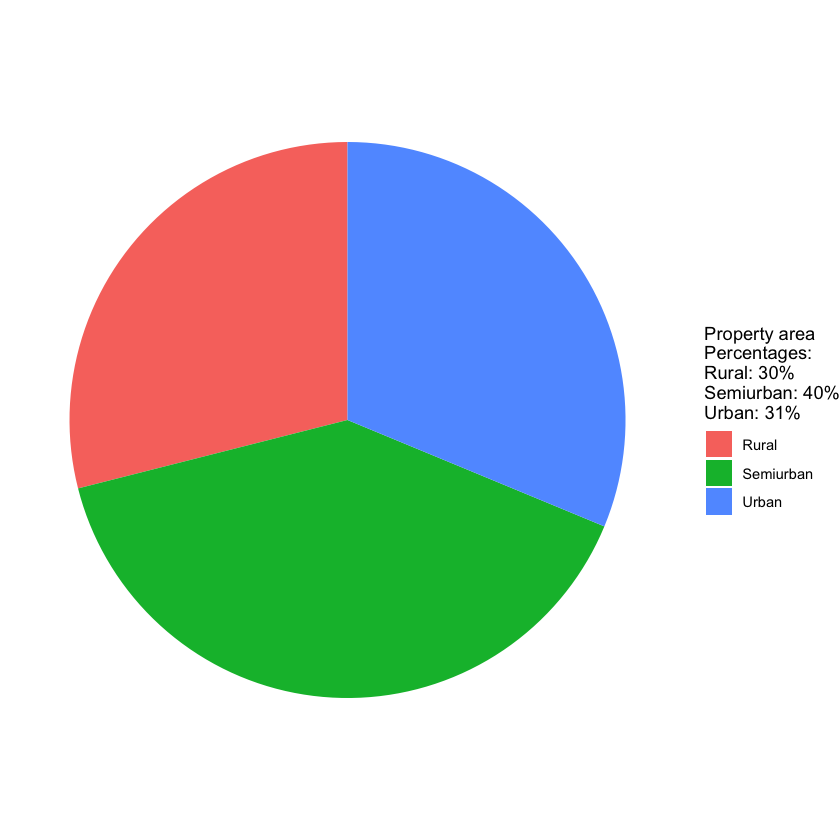

In [14]:
# Task 3-b Create a pie chart for Property_area and display percentages in legend respectively
percentages <- round(prop.table(table(clean_data$Property_Area)) * 100, 1)
percentages

# create the plot
ggplot(clean_data, aes(x = "", fill = Property_Area)) +
  geom_bar(width = 1, stat = "count") +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(fill = "Property area\nPercentages:\nRural: 30%\nSemiurban: 40%\nUrban: 31%")

# Task 4: Insights from the data (20 points)
Find out 'interesting' information from the dataset. Give two insights and Create a visualization for each of the insights. Explain in a few lines your reasoning. 

Your work's uniqueness and quality will be taken into account when evaluating your work (having a meaningful result and an aesthetic visualization). 

It was found from the plot that, the comparison was made between the Married loan applicans and Loan Amount sanctioned with a color code of the Property Area.
The conclusion is that it is more likely that the married people are sanctioned higher Loan Amounts and they live in Semiurban or Rural areas.Although there are outliers, the top unmarried loan applicants are from the rural areas.

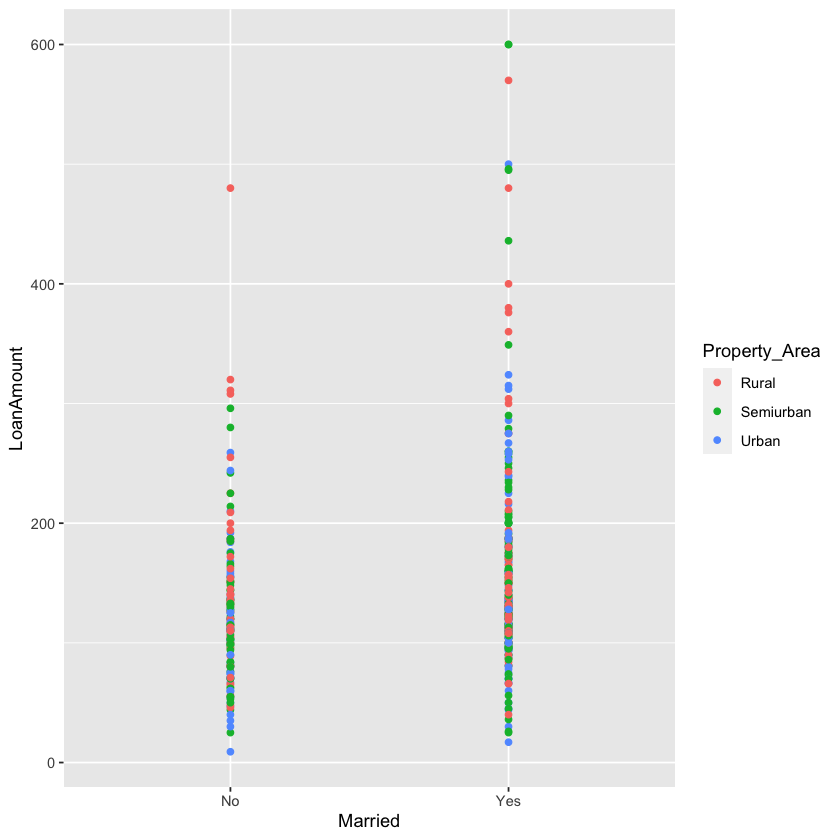

In [33]:
# Code and explaination for Task4

# Inference 1:
cat("It was found from the plot that, the comparison was made between the Married loan applicans and Loan Amount sanctioned with a color code of the Property Area.")
cat("\nThe conclusion is that it is more likely that the married people are sanctioned higher Loan Amounts and they live in Semiurban or Rural areas.")
cat("Although there are outliers, the top unmarried loan applicants are from the rural areas.")
ggplot(clean_data, aes(x = Married, y = LoanAmount, color = Property_Area)) +
  geom_point()



In the plot, we are taking the inference as to how the data is distributed in the dataset when we compare
The Education with Gender and if the Loan is sanctioned or not.We see in the jitter plot that the education has 'Graduate' and 'Non-Graduate' and Gender has 'Male' and 'Female'.
We see that most of the data points lie in the male, graduate category and the highest number of people with
sanctioned loan are the graduate males.
We also see that the least number of people who have loan sanctioned are Non-Graduate Females.

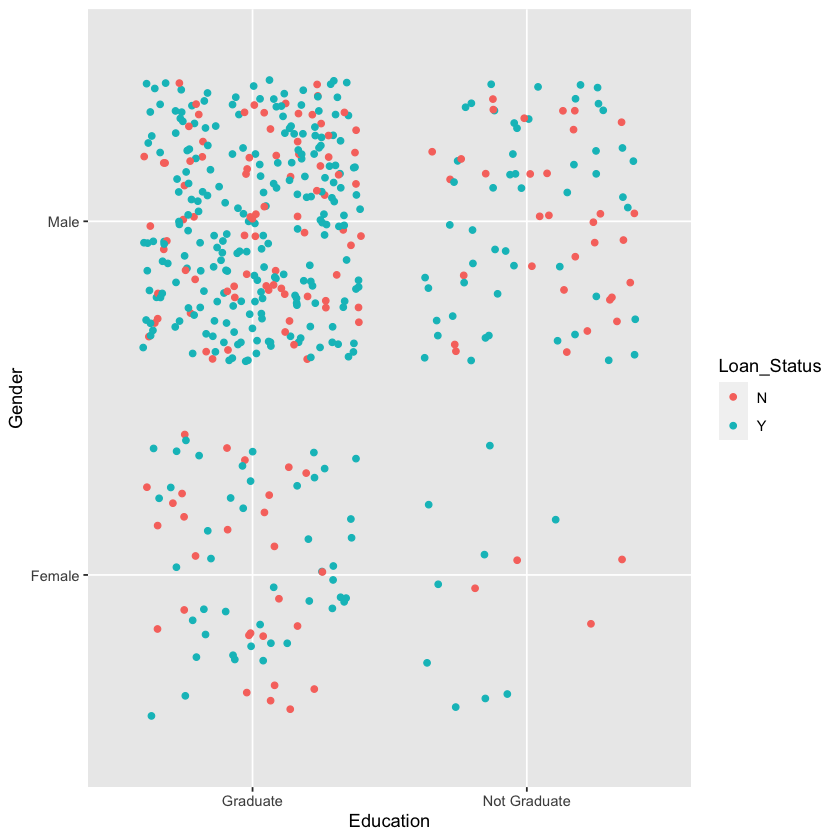

In [32]:
# Inference 2
cat("In the plot, we are taking the inference as to how the data is distributed in the dataset when we compare
The Education with Gender and if the Loan is sanctioned or not.")
cat("We see in the jitter plot that the education has 'Graduate' and 'Non-Graduate' and Gender has 'Male' and 'Female'.")
cat("\nWe see that most of the data points lie in the male, graduate category and the highest number of people with
sanctioned loan are the graduate males.")
cat("\nWe also see that the least number of people who have loan sanctioned are Non-Graduate Females.")

ggplot(clean_data, aes(x = Education, y = Gender, color = Loan_Status)) +
  geom_jitter()

# References:
1. https://ggplot2.tidyverse.org/reference/
2. https://towardsdatascience.com/data-cleaning-in-r-made-simple-1b77303b0b17
3. https://datatofish.com/r-jupyter-notebook/
4. https://statisticsglobe.com/filter-data-frame-rows-by-logical-condition-in-r

# Contributions:
### Navneeth Krishna (1002050459)
<p>
    Navneeth contributed to this project by completing the Task 2 and Task 4, where in Task 2 Aggregation, Filtering and Ranking of the dataset was conducted. In this task, the dataset is queried for different insights as per the questions. The insight is displayed in the standard output.
    Task 4 involved getting Insights from the data in which two custom plots were created with its own query into the data. One of them is a scatter plot and the other one is a jitter plot. Insights were derived from the data and plots were generated to confirm the insights. Navneeth has also worked on the overall progress of the R side of the project.
</p>

### Bharath Racharla (1001848518)
<p>
    Bharath contributed to this project by completing the Task 1, which was statistical exploratory data analysis and data cleaning. This steps involved understanding the different ways how to remove unwanted data from the dataset and create a clean data set. His work also involved printing dimensions of the cleaned data and the summary of the dataset.
</p>

### Pullapolla Shivani (1002038803)
<p>
    Shivani contributed to this project by working on the Task 3 which is Visualization. In this task, she generated two plots as per the question guidelines, one a bar plot and the other one is a pie chart with legends showing how the pie chart is divided.
</p>